<a href="https://colab.research.google.com/github/mahdinet1/iris_dataset_with-ANN/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
print('classes :',np.unique(train_labels))
labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

classes : [0 1 2 3 4 5 6 7 8 9]


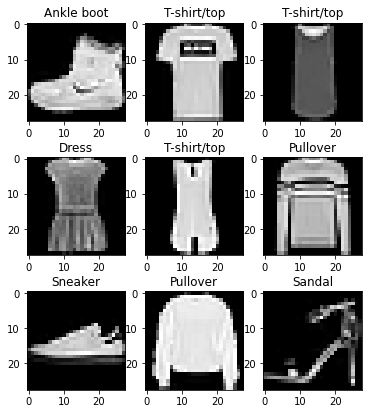

In [4]:
plt.figure(figsize=(6,7))
for i in range(9):
  plt.subplot(3,3,1+i)
  plt.title(labels[train_labels[i]])
  plt.imshow(train_images[i],cmap=plt.get_cmap('gray'))

plt.show()

In [5]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [6]:
model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [7]:
history = model.fit(train_images, train_labels, epochs=25, batch_size=32, validation_data=(test_images, test_labels), shuffle=True)

Epoch 1/25
1875/1875 [==============================] - 14s 6ms/step - loss: 0.5655 - accuracy: 0.7940 - val_loss: 0.4342 - val_accuracy: 0.8354
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4436 - accuracy: 0.8398 - val_loss: 0.4046 - val_accuracy: 0.8524
Epoch 3/25
1875/1875 [==============================] - 8s 5ms/step - loss: 0.4114 - accuracy: 0.8511 - val_loss: 0.3874 - val_accuracy: 0.8646
Epoch 4/25
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3926 - accuracy: 0.8571 - val_loss: 0.3938 - val_accuracy: 0.8572
Epoch 5/25
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3800 - accuracy: 0.8638 - val_loss: 0.4138 - val_accuracy: 0.8483
Epoch 6/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3687 - accuracy: 0.8666 - val_loss: 0.3741 - val_accuracy: 0.8652
Epoch 7/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3568 - accuracy: 0.8708 - val_loss: 0.3700 - val_accuracy

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

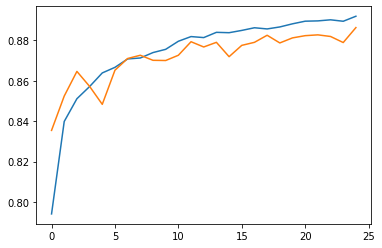

In [13]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')

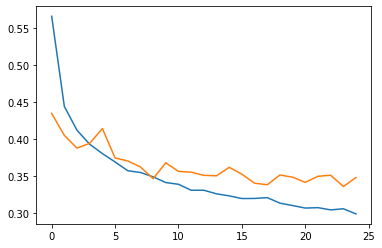

In [14]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')

In [15]:
%tensorboard --logdir logs/scalars

UsageError: Line magic function `%tensorboard` not found.
